In [1]:
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import random

import connect_four
import mcts
import connect_net
import connect_plot
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# nnet = connect_net.ConnectNet()
nnet = connect_net.load_model("model_save_04.model")
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)

ConnectNet(
  (layer1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
  )
  (fc): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 4), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=8, bias=True)
  )
)


In [51]:
mcts.policy_iteration(nnet=nnet, num_iterations=100, num_episodes=25, num_mcts_sims=50, optimizer=optimizer)
connect_net.save_model(nnet=nnet, path="model_save_04.model")


Iteration: 0::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 1::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 2::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 3::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 4::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 5::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 6::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 7::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 8::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 9::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 10::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 11::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
Iteration: 12::0,1,2,3,4,5,6,7,8,9,10

In [19]:
import cProfile
cProfile.run('mcts.policy_iteration(nnet=nnet, num_iterations=1, num_episodes=25, num_mcts_sims=25, optimizer=optimizer)', sort="tottime")


Iteration: 0::0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,         2869538 function calls (2761940 primitive calls) in 24.696 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
78413/12375   11.529    0.000   24.193    0.002 mcts.py:35(search)
    78908    2.007    0.000    3.036    0.000 connect_four.py:31(game_ended)
    66533    1.880    0.000    2.697    0.000 connect_four.py:53(next_state)
   486296    1.335    0.000    1.335    0.000 {method 'sum' of 'torch._C._TensorBase' objects}
    67028    1.257    0.000    1.257    0.000 {method 'astype' of 'numpy.ndarray' objects}
    66038    0.926    0.000    1.312    0.000 connect_four.py:44(get_valid_actions)
    66533    0.829    0.000    0.829    0.000 {method 'join' of 'str' objects}
     8312    0.676    0.000    0.676    0.000 {built-in method conv2d}
   406901    0.617    0.000    0.617    0.000 {method 'sqrt' of 'torch._C._TensorBase' objects}
    

In [43]:
test_state = np.zeros([6,7], dtype=np.int32)
test_state[5,3] = 1
test_state[5,2] = -1
test_state[4,3] = 1
test_state[3,3] = 1
test_state[2,3] = 1
test_state[0,0] = 1
test_state[1,0] = -1
test_state[2,0] = 1
test_state[3,0] = -1
test_state[4,0] = 1
test_state[5,0] = -1
test_state_tensor = torch.Tensor(test_state).reshape(6, 7)


In [44]:
state_sum = test_state_tensor[tensor_pairs_0, tensor_pairs_1].sum(axis=1)
test_state_tensor

tensor([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  1.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  1.,  0.,  0.,  0.],
        [-1.,  0., -1.,  1.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

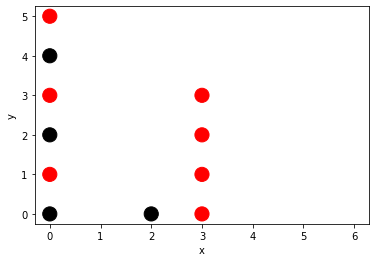

In [46]:
connect_plot.print_board(test_state_tensor)

In [3]:
output = mcts.execute_episode(nnet=nnet, num_mcts_sims=25, nc=mcts.NetworkCache(nnet=nnet))

/Users/raymond/code/FinalProject563/connect_plot.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


27 0 1


<Figure size 432x288 with 0 Axes>

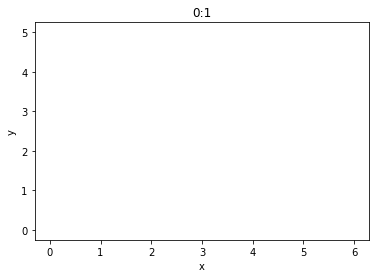

<Figure size 432x288 with 0 Axes>

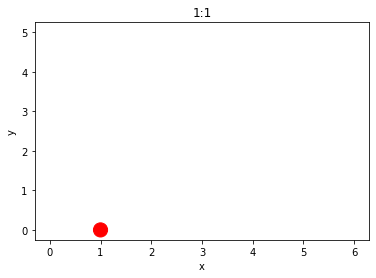

<Figure size 432x288 with 0 Axes>

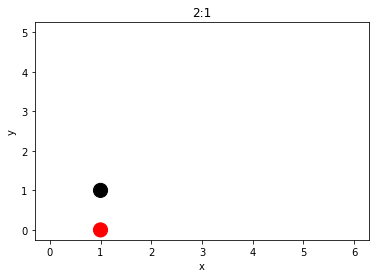

<Figure size 432x288 with 0 Axes>

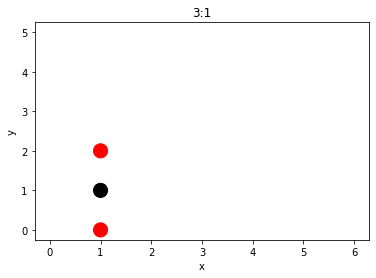

<Figure size 432x288 with 0 Axes>

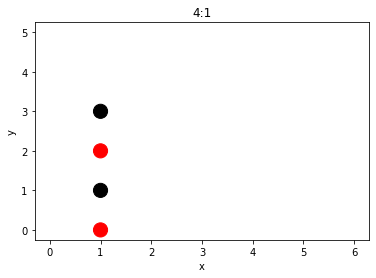

<Figure size 432x288 with 0 Axes>

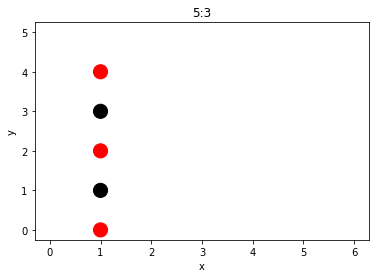

<Figure size 432x288 with 0 Axes>

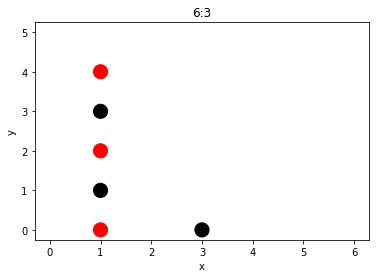

<Figure size 432x288 with 0 Axes>

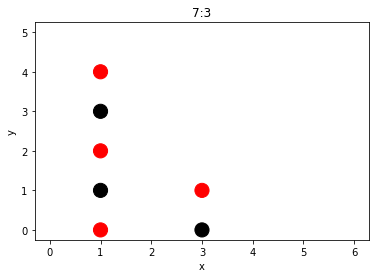

<Figure size 432x288 with 0 Axes>

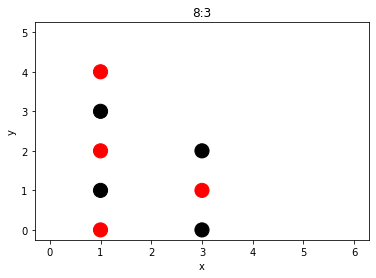

<Figure size 432x288 with 0 Axes>

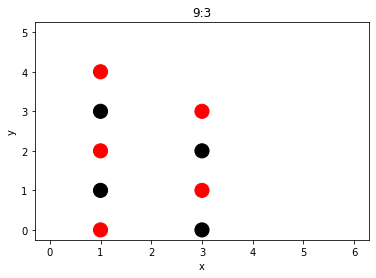

<Figure size 432x288 with 0 Axes>

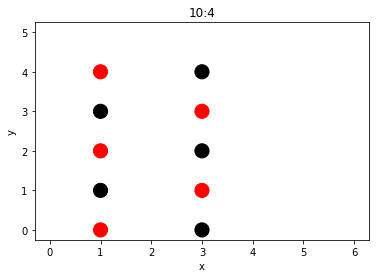

<Figure size 432x288 with 0 Axes>

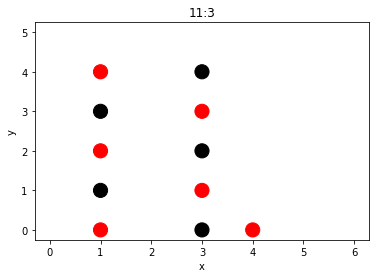

<Figure size 432x288 with 0 Axes>

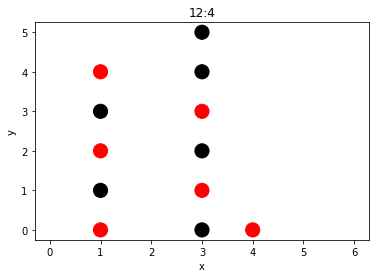

<Figure size 432x288 with 0 Axes>

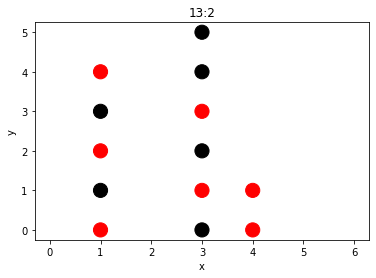

<Figure size 432x288 with 0 Axes>

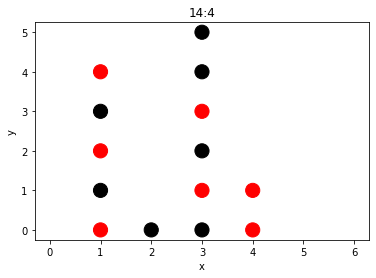

<Figure size 432x288 with 0 Axes>

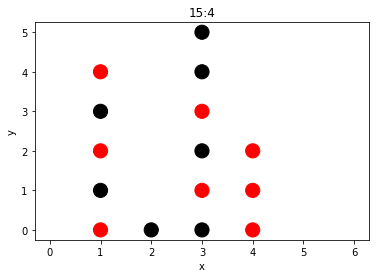

<Figure size 432x288 with 0 Axes>

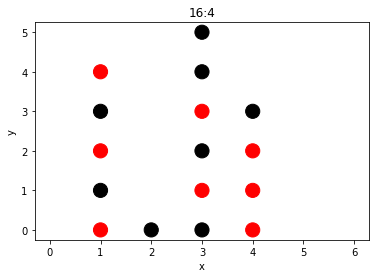

<Figure size 432x288 with 0 Axes>

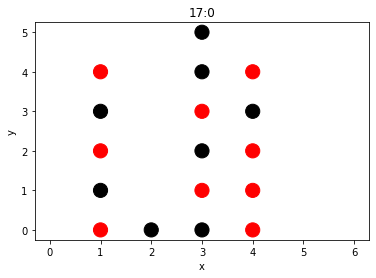

<Figure size 432x288 with 0 Axes>

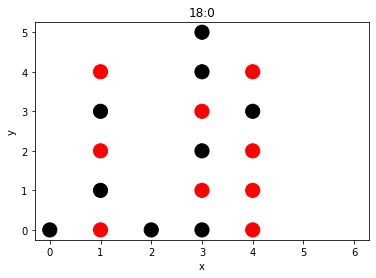

<Figure size 432x288 with 0 Axes>

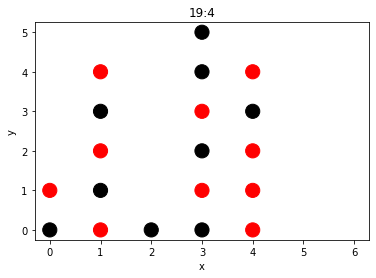

<Figure size 432x288 with 0 Axes>

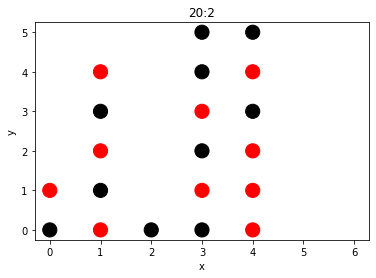

<Figure size 432x288 with 0 Axes>

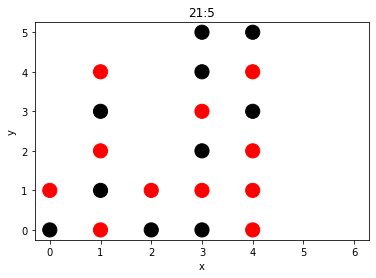

<Figure size 432x288 with 0 Axes>

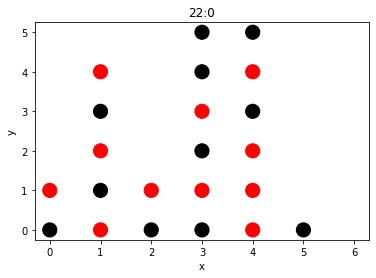

<Figure size 432x288 with 0 Axes>

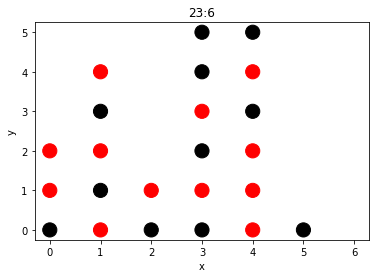

<Figure size 432x288 with 0 Axes>

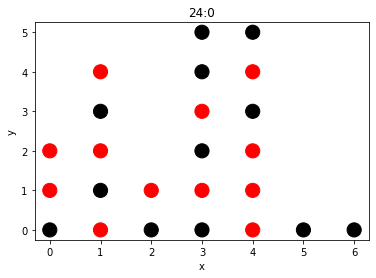

<Figure size 432x288 with 0 Axes>

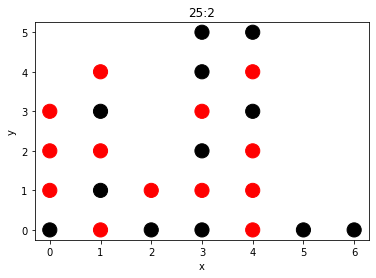

<Figure size 432x288 with 0 Axes>

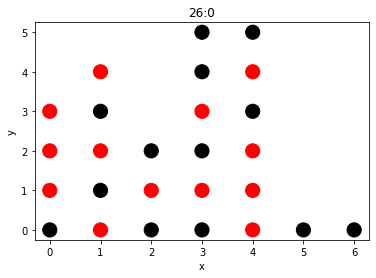

In [4]:
for j, example in enumerate(reversed(output)):
    connect_plot.print_board(example[0] * ((-1)**(j)), title=f"{j}:{example[2]}")
print(len(output), example[2], example[3])
# print_board(example[0] * ((-1)**(len(output)-1)))